In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import cifar10
from keras.utils import to_categorical

Using TensorFlow backend.


### 【課題】CNNとはどういった手法なのか記述せよ  
CNNはフィルタ内の領域の情報を畳み込んで作成する畳み込み層とを導入とプーリング層を導入したNeural Networkのことである。CNNは特徴を抽出するための検出器であるフィルタのパラメータを自動で学習していく。
畳み込み層はフィルタを移動させながら適用することで作成し、フィルタの数だけ作成される。これを重ねて活性化関数で繋いでいくことで、ネットワークを構築する。
畳み込みにより点ではなく領域ベースでの特徴抽出が可能になり、画像の移動や変形などに頑健になる。エッジなど領域ベースでないとわからない特徴抽出も可能になる。

### 【課題】畳み込み層とプーリング層について記述せよ  
畳み込み層はフィルタによる特徴マップの取得を目的とし、プーリング層は畳み込み層からの出力である特徴マップを縮小して新たな特徴マップを得ることを目的とする。


### 【課題】CNNの精度を向上させるためにはどのようなことをするのが良いか記述せよ  
・なるべく多くの学習データを用意する  
・ハイパーパラメータを適切にチューニングする  
・dropout層を追加することにより、過学習を防ぐことができる  
・過学習しないようにしつつ、層の数とノードの数を増やすことにより表現力を向上させる。  
・フィルター活用後の画像に対して活性化関数を適用する  

過学習を防ぐ手法として  
・活性化関数を変更する（ReLUなど）  
・ネットワークの重みの初期値を事前学習する  
・学習係数を下げる  
・Batch Normalizationにより正則化を行う  

なるべく多くの学習データを用意する方法として  
・画像の位置をずらしたり、少し回転させたりしたものを学習させることで学習データを水増しする。（kerasでいうImageDataGenerator）


In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

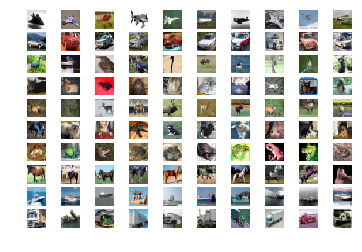

In [12]:
#画像をまとめて表示

nclasses = 10
pos = 1
for i in range(nclasses):
    targets = np.where(y_train == i)[0]
    for idx in targets[:10]:
        plt.subplot(10, 10, pos)
        img = X_train[idx]
        plt.imshow(img)
        plt.axis('off')
        pos += 1
plt.show()


In [3]:
#画像サイズを取得
img_rows =  X_train.shape[1]
img_cols = X_train.shape[2]
#分類する数を取得
num_classes = to_categorical(y_train).shape[1]
#入力データの形状を取得
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])

In [4]:
#正規化するコードを記述
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")
X_train /= 255.0
X_test /= 255.0

In [5]:
#one-hot表現にするコードを記述
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation

In [7]:
#### 【課題】モデルを作成

model = Sequential()
model.add(Conv2D(96,kernel_size=(11,11), padding="same",input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D((3,3),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256,kernel_size=(5,5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D((3,3),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(384,kernel_size=(3,3), padding="same"))
model.add(Conv2D(384,kernel_size=(3,3), padding="same"))
model.add(Conv2D(256,kernel_size=(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D((3,3),strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(2048))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2048))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [8]:
model.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(),metrics=["accuracy"])
epochs = 10
batch_size = 50

model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs,verbose=1, validation_data=[X_test,y_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3205s - loss: 2.0257 - acc: 0.3119 - val_loss: 1.6214 - val_acc: 0.3909
Epoch 2/10
50000/50000 [==============================] - 5860s - loss: 1.6061 - acc: 0.4239 - val_loss: 1.7457 - val_acc: 0.4053
Epoch 3/10
50000/50000 [==============================] - 3369s - loss: 1.4070 - acc: 0.5020 - val_loss: 1.3795 - val_acc: 0.5158
Epoch 4/10
50000/50000 [==============================] - 3258s - loss: 1.2319 - acc: 0.5686 - val_loss: 1.3009 - val_acc: 0.5379
Epoch 5/10
50000/50000 [==============================] - 3042s - loss: 1.0901 - acc: 0.6205 - val_loss: 1.4110 - val_acc: 0.5099
Epoch 6/10
50000/50000 [==============================] - 52765s - loss: 0.9676 - acc: 0.6660 - val_loss: 1.0863 - val_acc: 0.6208
Epoch 7/10
50000/50000 [==============================] - 3096s - loss: 0.8698 - acc: 0.7014 - val_loss: 1.2957 - val_acc: 0.5709
Epoch 8/10
50000/50000 [===============

In [9]:
### 【課題】モデルを作成

model1 = Sequential()
model1.add(Conv2D(20, kernel_size=(5,5), strides=1, input_shape=input_shape))
model1.add(Activation("relu"))
model1.add(MaxPooling2D((2,2), strides=(2,2)))
 
model1.add(Conv2D(50, kernel_size=(5,5), strides=1))
model1.add(Activation("relu"))
model1.add(MaxPooling2D((2,2), strides=(2,2)))
model1.add(Dropout(0.25))
 
model1.add(Flatten())
model1.add(Dense(500))
model1.add(Activation("relu"))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation("softmax"))

In [10]:
model1.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(),metrics=["accuracy"])
epochs = 50
batch_size = 50

model1.fit(X_train,y_train,batch_size=batch_size, epochs=epochs,verbose=1, validation_data=[X_test,y_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 117s - loss: 1.5749 - acc: 0.4255 - val_loss: 1.2936 - val_acc: 0.5407
Epoch 2/50
50000/50000 [==============================] - 138s - loss: 1.2745 - acc: 0.5470 - val_loss: 1.1678 - val_acc: 0.5857
Epoch 3/50
50000/50000 [==============================] - 126s - loss: 1.1509 - acc: 0.5939 - val_loss: 1.0347 - val_acc: 0.6371
Epoch 4/50
50000/50000 [==============================] - 135s - loss: 1.0517 - acc: 0.6283 - val_loss: 1.0507 - val_acc: 0.6309
Epoch 5/50
50000/50000 [==============================] - 131s - loss: 0.9840 - acc: 0.6539 - val_loss: 0.9616 - val_acc: 0.6634
Epoch 6/50
50000/50000 [==============================] - 118s - loss: 0.9269 - acc: 0.6746 - val_loss: 0.9013 - val_acc: 0.6865
Epoch 7/50
50000/50000 [==============================] - 115s - loss: 0.8794 - acc: 0.6890 - val_loss: 0.8847 - val_acc: 0.6919
Epoch 8/50
50000/50000 [=======================

### 【課題】このようなモデルにした理由　  
以上の２つは　AlexNetとLeNetをアレンジしたもの。LeNetはdropout層を追加することで最終的な認識精度を87%近くまで高めることができた